In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Datasets/cereal.csv')

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


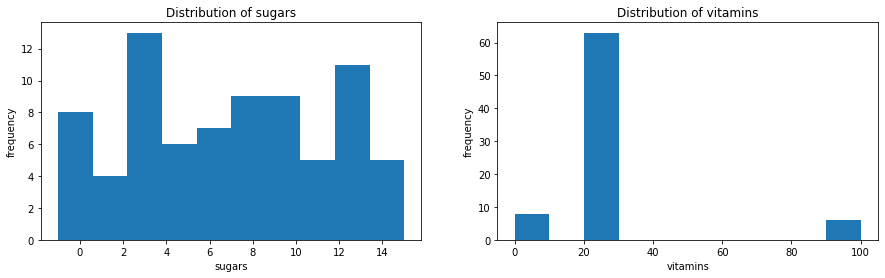

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

ax1.hist(df['sugars'])
ax1.set_title('Distribution of sugars')
ax1.set_xlabel('sugars')
ax1.set_ylabel('frequency')

ax2.hist(df['vitamins'])
ax2.set_title('Distribution of vitamins')
ax2.set_xlabel('vitamins')
ax2.set_ylabel('frequency');

In [9]:
mfr_names = {'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'}

df['mfr_names'] = df['mfr'].map(mfr_names)

In [10]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_names
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


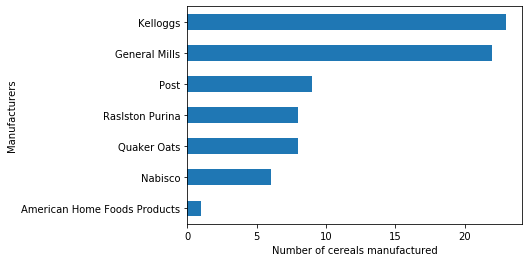

In [18]:
df['mfr_names'].value_counts(ascending=True).plot(kind='barh')
plt.ylabel('Manufacturers')
plt.xlabel('Number of cereals manufactured');

In [19]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_names
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


In [24]:
# Choose numeric columns as 'predictors' and 'target' variables
X = df.loc[:, 'calories':'cups']
y = df['rating']

# split data into 75-25 train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
model = LinearRegression()

model.fit(X_train, y_train);

In [39]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error on test set: {mse}')

Mean Squared Error on test set: 9.107561421514474e-14
